# Words _have_ friends - collocation analysis

### COMM313 Spring 2019 (02/25/19)

## Overview

* Discovering meaning through context
* Comparing words through collocation
* Collocation profiles





## Readings


* Baker, P. (2006) Using Corpora in Discourse Analysis. London: Continuum - **Read Ch. 5**
* NLTK Book Ch. 4 (**Sections 1&2**) http://www.nltk.org/book/ch04.html 



<div style="font-size: 16pt">
<ul>
    <li>"You shall know a lot about a words from the company it keeps." (Firth 1957)</li>
    <br/>
    <li>"Words occur in characteristic collocations, which show the associations and connotations they have, and therefore the assumptions which they embody" (Stubbs 1996)</li>
    <br/>
    <li>"<i>Collocation</i>, identified by Firth (1957), is a way of demonstrating (relatively) exclusive or frequent relationships between words (or other linguistic phenomenon). If two words collocate, then they have a tendency to occur near or next to each other in naturally occurring language use." (Baker 2010: 24)</li>
</ul>
</div>

## Setup

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import math

from collections import Counter

plt.style.use('seaborn')

## Functions

In [2]:
def tokenize(text, lowercase=True, strip_chars=''):
    '''turn a string into a list of whitespace separated tokens - after observing lowercase flag and stripping specified characters
    
    Args:
        text        -- a string object containing the text to be tokenized
        lowercase   -- whether the string should be lowercased before tokenization (default: True)
        strip_chars -- a string containing a series of characters which should be stripped from text before tokenization (default: empty string)
        
    
    Returns:
        list of tokens
    '''
    rdict = str.maketrans('','',strip_chars)
    
    if lowercase:
        text=text.lower()
        
    text = text.translate(rdict)
    
    tokens = text.split()
    
    return tokens
        

In [3]:
def collocates(tokens, kw, win=[4,4]):
    '''return the collocates in a window around a given keyword
    
    Args:
          tokens -- a list of tokens
          kw     -- keyword string to find and get collocates for
          win    -- a list of number of tokens to left (index 0) and right (index 1) to use; default: [4,4]
    
    Returns:
          a list of contexts (matching window specification) around each instance of keyword in tokens
    '''
    hits = [p for p,t in enumerate(tokens) if t==kw]
    
    context=[]
    for hit in hits:
        left = [] if win[0]<1 else tokens[hit-win[0]:hit]
        right = [] if win[1]<1 else tokens[hit+1:hit+win[1]+1]
        
        context.extend(left)
        context.extend(right)
        
    return context

In [4]:
def get_colls(texts,kw, win=[4,4]):
    '''create a collocate frequency list for instances of a kw in a list of texts
    
    Args:
        texts  -- a list of tokenized texts
        kw     -- keyword string to find and get collocates for
        win    -- a list of number of tokens to left (index 0) and right (index 1) to use; default: [4,4]
    
    Returns:
        a list-of-tuples where each tuple is (collocate, freq_with_kw, coll_total_freq)
    '''
    word_dist = Counter()
    colls = Counter()
    for text, tokens in texts.items():
        word_dist.update(tokens)
        colls.update(collocates(tokens,kw, win))
    
    return [(str(k),v, word_dist[k]) for k,v in colls.items()], word_dist.get(kw), sum(word_dist.values())

In [5]:
def pmi(A, B, AB, N):
    '''calculate pointwise mutual information for a pair of words given their co-occurring frequency and total frequencies
    
    Args:
        A   -- total frequency of word 1
        B   -- total frequency of word 1
        AB  -- frequency of word 1 and word 2 together
        N   -- number of tokens in corpus/sample
        
    Returns:
        the PMI value   log2( AB / A*B * N)
    '''
    return math.log2(N* (AB / (A * B)))

# Using `corpus.byu.edu` tool for collocation analysis

* Pearce, M. 2008. Investigating the collocational behaviour of MAN and WOMAN in the BNC using Sketch Engine. _Corpora_, 3 (1) 1-29.


* Using your account on `corpus.byu.edu` go to the _British National Corpus_ https://corpus.byu.edu/bnc/


* Examine the collocates of **MAN** and **WOMAN** in terms of:
    * the things they *DO* (verbs they are the subject of - VERB in right context)
    * the things *DONE* to them (verbs they are the object of - VERB in left context)
    * they way they are characterized/described (premodifying adjectives - ADJ in left context)

<img src="collocate1.png" width="600"/>

<img src="collocate2.png" style="border: 1px solid gray" width="600"/>

<img src="collocate3.png" style="border: 1px solid gray" width="600"/>

<img src="collocate4.png" style="border: 1px solid gray" width="600"/>

<img src="collocate5.png" style="border: 1px solid gray" width="600"/>

<img src="collocate6.png" width="600"/>

## From _champion_ to _disgraced_ cyclist

* The collocates of the name _Lance Armstrong_ in news articles 1990-2018

<div>

<img src="la1.jpeg" style="float: left"/>
<img src="la2.jpeg" style="float: left"/>
<img src="la3.jpeg" style="float: left"/>

<img src="la4.jpeg" style="float: left"/>
<img src="la5.jpeg" />
<img src="la6.jpeg" style="float: left"/>
</div>

* Recent ABC profile: https://www.youtube.com/watch?v=DX38XZkulbw
    >Lance Armstrong, the seven-time Tour de France champion and cycling legend who was stripped of his victories due to a doping scandal years back, speaks out in an interview with CNBC’s Andrew Ross Sorkin about his rise, fall and hope for redemption.

### The data

* Search for `Lance|Armstrong AND (bike|cycling|bicycle)` in _LexisNexis_ news sections 1990-2018 (Feb)

* Each article is in a single text file

In [6]:
data_dir = '/data/armstrong/texts'
texts=[f for f in os.listdir(data_dir) if f.endswith('.txt')]

In [7]:
texts[:20]

['t3218_armstrong_05_10_2015.txt',
 't4189_armstrong_11_13_2008.txt',
 't1182_armstrong_07_06_1994.txt',
 't3896_armstrong_07_09_2000.txt',
 't1997_armstrong_07_07_1993.txt',
 't1017_armstrong_07_09_1993.txt',
 't3871_armstrong_07_11_2005.txt',
 't2770_armstrong_02_08_2015.txt',
 't1586_armstrong_05_16_1994.txt',
 't1656_armstrong_07_25_1994.txt',
 't3310_armstrong_02_06_2016.txt',
 't3913_armstrong_12_20_2005.txt',
 't1623_armstrong_07_01_1993.txt',
 't3784_armstrong_07_27_1999.txt',
 't2840_armstrong_04_26_2014.txt',
 't912_armstrong_01_22_2005.txt',
 't2208_armstrong_07_18_2011.txt',
 't1698_armstrong_08_23_1996.txt',
 't3115_armstrong_01_17_2013.txt',
 't1507_armstrong_07_06_1993.txt']

* Example of what an article file looks like

In [8]:
print(open(os.path.join(data_dir,'t3218_armstrong_05_10_2015.txt')).read())




                                Scottish Express

                              May 10, 2015 Sunday
                                   Edition 1;
                                    Scotland

My Nan would not let me turn down honour, says Sir Wiggo

BYLINE: Camilla Tominey

SECTION: NEWS; Pg. 11

LENGTH: 528 words


OLYMPIC champion Sir Bradley Wiggins was going to refuse his knighthood - until
his grandmother had words.

The cyclist revealed how his "Nan" said his grandfather would "turn in his
grave" if he didn't accept it.

He was honoured by the Queen after becoming the first British winner of the Tour
de France and winning gold at the London Olympics in 2012.

He told Radio 4's Desert Island Discs: "I never saw myself as a Sir or anything.
I said to my Nan that I wasn't going to accept it. My grandad had died in 2010
and she said, 'You're stupid, you're ****** crazy, you've got to accept that'.

"I saw it from my Nan's point of view. She remembered when I was a baby in that
fla

In [9]:
print(len(texts), 'to process')

4547 to process


### Tokenize

* Create a token dictionary with an entry for each text
    * __KEY__ the text filename
    * __VALUE__ a list of tokens for that text

In [10]:
to_strip = '"!-().,_*'
text_tokens = {}

num_of_text = len(texts)

for tidx, text in enumerate(texts,1):
    if tidx % 100 == 1:
        print('Processing', tidx, 'of', num_of_text)
    
    article = open(os.path.join(data_dir,text)).read()
    text_tokens[text] = tokenize(article, strip_chars=to_strip) 

print('DONE')

Processing 1 of 4547
Processing 101 of 4547
Processing 201 of 4547
Processing 301 of 4547
Processing 401 of 4547
Processing 501 of 4547
Processing 601 of 4547
Processing 701 of 4547
Processing 801 of 4547
Processing 901 of 4547
Processing 1001 of 4547
Processing 1101 of 4547
Processing 1201 of 4547
Processing 1301 of 4547
Processing 1401 of 4547
Processing 1501 of 4547
Processing 1601 of 4547
Processing 1701 of 4547
Processing 1801 of 4547
Processing 1901 of 4547
Processing 2001 of 4547
Processing 2101 of 4547
Processing 2201 of 4547
Processing 2301 of 4547
Processing 2401 of 4547
Processing 2501 of 4547
Processing 2601 of 4547
Processing 2701 of 4547
Processing 2801 of 4547
Processing 2901 of 4547
Processing 3001 of 4547
Processing 3101 of 4547
Processing 3201 of 4547
Processing 3301 of 4547
Processing 3401 of 4547
Processing 3501 of 4547
Processing 3601 of 4547
Processing 3701 of 4547
Processing 3801 of 4547
Processing 3901 of 4547
Processing 4001 of 4547
Processing 4101 of 4547
Proc

* Show the first 50 tokens of the file `t3218_armstrong_05_10_2015.txt`

In [11]:
text_tokens['t3218_armstrong_05_10_2015.txt'][:50]

['scottish',
 'express',
 'may',
 '10',
 '2015',
 'sunday',
 'edition',
 '1;',
 'scotland',
 'my',
 'nan',
 'would',
 'not',
 'let',
 'me',
 'turn',
 'down',
 'honour',
 'says',
 'sir',
 'wiggo',
 'byline:',
 'camilla',
 'tominey',
 'section:',
 'news;',
 'pg',
 '11',
 'length:',
 '528',
 'words',
 'olympic',
 'champion',
 'sir',
 'bradley',
 'wiggins',
 'was',
 'going',
 'to',
 'refuse',
 'his',
 'knighthood',
 'until',
 'his',
 'grandmother',
 'had',
 'words',
 'the',
 'cyclist',
 'revealed']

### Examining distribution of articles by year

* Each filename includes the publication date, e.g. `t3218_armstrong_05_10_2015.txt`
* So we can extract the year with some string functions

In [1]:
't3218_armstrong_05_10_2015.txt'.split('_')

['t3218', 'armstrong', '05', '10', '2015.txt']

In [13]:
't3218_armstrong_05_10_2015.txt'.split('_')[-1]

'2015.txt'

In [14]:
't3218_armstrong_05_10_2015.txt'.split('_')[-1][:-4]

'2015'

* Can use the `Counter()` object to create a distribution of articles per year

In [15]:
art_dist = Counter([f.split('_')[-1][:-4] for f in texts])

In [16]:
art_dist.most_common()

[('1996', 461),
 ('2013', 430),
 ('2005', 333),
 ('1995', 309),
 ('2009', 239),
 ('2004', 226),
 ('1994', 219),
 ('2012', 204),
 ('1998', 195),
 ('1993', 194),
 ('2015', 185),
 ('2014', 182),
 ('2003', 166),
 ('2010', 144),
 ('2008', 116),
 ('1997', 110),
 ('2006', 110),
 ('2016', 104),
 ('2000', 101),
 ('2011', 100),
 ('2002', 83),
 ('2007', 83),
 ('2017', 79),
 ('2001', 54),
 ('1992', 52),
 ('1999', 36),
 ('2018', 14),
 ('1991', 11),
 ('1990', 7)]

* Nicer to plot this!

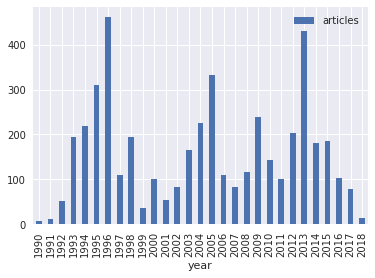

In [17]:
art_df = pd.DataFrame.from_records(list(art_dist.items()), columns=['year','articles'])
art_df.sort_values('year').plot.bar(x='year',y='articles')

### Create a word and bigram frequency list of all articles

In [18]:
word_dist = Counter()
bigram_dist = Counter()
for text in text_tokens:
    tokens = text_tokens[text]
    bigrams = ["{} {}".format(tokens[i],tokens[i+1]) for i,_ in enumerate(tokens[:-1])]
    word_dist.update(tokens)
    bigram_dist.update(bigrams)

In [19]:
word_dist.most_common(50)

[('the', 187630),
 ('a', 76614),
 ('to', 75911),
 ('and', 73695),
 ('of', 73297),
 ('in', 70767),
 ('for', 31938),
 ('he', 30647),
 ('is', 26508),
 ('his', 25759),
 ('was', 25414),
 ('on', 25143),
 ('that', 23690),
 ('with', 21425),
 ('at', 20712),
 ('i', 19575),
 ('it', 18731),
 ('armstrong', 18056),
 ('as', 16393),
 ('tour', 16349),
 ('said', 14223),
 ('from', 14195),
 ('but', 14045),
 ('be', 13341),
 ('by', 12964),
 ('has', 12397),
 ('who', 11967),
 ('cycling', 11815),
 ('will', 11169),
 ('race', 11091),
 ('have', 10933),
 ('team', 10684),
 ('this', 10446),
 ('an', 10106),
 ('are', 9851),
 ('not', 9735),
 ('all', 9078),
 ('lance', 8716),
 ('france', 8684),
 ('had', 8515),
 ('bike', 8298),
 ('de', 8171),
 ('you', 7895),
 ('one', 7854),
 ('when', 7550),
 ('time', 7318),
 ('after', 7297),
 ('first', 7009),
 ('us', 6991),
 ('up', 6941)]

In [20]:
bigram_dist.most_common(50)

[('in the', 20465),
 ('of the', 19318),
 ('the tour', 7798),
 ('for the', 7716),
 ('on the', 7692),
 ('tour de', 7367),
 ('to the', 7126),
 ('de france', 6631),
 ('at the', 6628),
 ('lance armstrong', 6291),
 ('language: english', 4507),
 ('in a', 4386),
 ('and the', 4170),
 ('to be', 3984),
 ('with the', 3611),
 ('he was', 3570),
 ('the first', 3204),
 ('it was', 3192),
 ('will be', 3170),
 ('the race', 3085),
 ('from the', 3010),
 ('with a', 2914),
 ('is a', 2852),
 ('of a', 2822),
 ('for a', 2784),
 ('one of', 2782),
 ('he said', 2731),
 ('as a', 2656),
 ('of his', 2637),
 ('the world', 2587),
 ('all rights', 2532),
 ('rights reserved', 2530),
 ('to win', 2392),
 ('on a', 2379),
 ('publicationtype: newspaper', 2292),
 ('by the', 2261),
 ('the us', 2246),
 ('won the', 2234),
 ('as the', 2216),
 ('was a', 2206),
 ('is the', 2130),
 ('has been', 2129),
 ('and a', 2011),
 ('it is', 1954),
 ('i was', 1937),
 ('more than', 1921),
 ('in his', 1765),
 ('to a', 1757),
 ('the sport', 1731),
 

### Get collocates of the word `armstrong` four words to the left

* Looking for frequent words that premodify `armstrong`, e.g. 
    ```
    cancer survivor lance armstrong
    doping cheat lance armstrong
    seven time chamption lance armstrong
    ```

In [21]:
colls = Counter()
for text in text_tokens:
    colls.update(collocates(text_tokens[text],'armstrong', [4,0]))

* How many times does `champion` come 1-4 words before `armstrong`?

In [22]:
colls.get('champion')

382

* How many times does `champion` occur in the whole corpus?

In [23]:
word_dist.get('champion')

3471

In [24]:
colls.get('cheat'), word_dist.get('cheat')

(39, 337)

In [25]:
for coll in ['winner', 'great', 'amazing', 'cancer', 'survivor', 'cheat', 'disgraced', 'fallen']:
    print("{: >20}{: >10}{: >10}".format(coll, colls.get(coll), word_dist.get(coll)))

              winner       216      2240
               great        40      1803
             amazing        13       321
              cancer       220      4236
            survivor        41       351
               cheat        39       337
           disgraced       116       334
              fallen         3       109


In [26]:
colls.most_common(30)

[('lance', 6396),
 ('the', 3334),
 ('of', 1645),
 ('to', 1449),
 ('in', 1150),
 ('and', 1145),
 ('a', 1017),
 ('that', 820),
 ('for', 768),
 ('with', 746),
 ('france', 518),
 ('american', 497),
 ('said', 494),
 ('his', 493),
 ('cyclist', 464),
 ('on', 443),
 ('as', 443),
 ('de', 433),
 ('cycling', 433),
 ('was', 417),
 ('by', 389),
 ('tour', 388),
 ('champion', 382),
 ('he', 382),
 ('words', 355),
 ('but', 351),
 ('is', 328),
 ('when', 304),
 ('it', 300),
 ('race', 297)]

* `get_colls()` function wraps the `collocate()` function and gives both collocate co-occurrence and total frequency

In [27]:
get_colls(text_tokens,'armstrong',win=[4,0])[:50]

([('actually', 9, 413),
  ('about', 279, 6931),
  ('the', 3334, 187630),
  ('lance', 6396, 8716),
  ('my', 105, 5213),
  ('ride', 113, 4759),
  ('with', 746, 21425),
  ('a', 1017, 76614),
  ('road', 80, 4558),
  ('event', 57, 2851),
  ('trial', 56, 1736),
  ('and', 1145, 73695),
  ('american', 497, 3055),
  ('france', 518, 8684),
  ('alongside', 39, 225),
  ('teammate', 93, 832),
  ('race', 297, 11091),
  ('team', 206, 10684),
  ('postalservice', 1, 1),
  ('riders', 84, 4765),
  ('who', 178, 11967),
  ('helped', 31, 615),
  ('top', 71, 2806),
  ('is', 328, 26508),
  ('13th', 1, 145),
  ('overall', 98, 1861),
  ('fourth', 24, 1127),
  ('last', 166, 6289),
  ('year', 191, 6093),
  ('goal', 13, 513),
  ('week', 81, 2314),
  ('when', 304, 7550),
  ('very', 29, 1811),
  ('antithesis', 3, 5),
  ('of', 1645, 73297),
  ('everything', 24, 567),
  ('around', 43, 2026),
  ('time', 197, 7318),
  ('that', 820, 23690),
  ('victory', 72, 2141),
  ('over', 127, 4287),
  ('third', 51, 2167),
  ('07', 2

### Examining similarities and changes of collocates over time

In [28]:
cuts=list(range(1990,2021,5))

In [29]:
coll_dict={}
for i, end in enumerate(cuts[1:],1):
    print(i,cuts[i-1],'-',end)
    start = cuts[i-1]
    
    files_to_process = [f for f in texts if int(f.split('_')[-1][:-4]) < end 
                                            and int(f.split('_')[-1][:-4])>=start]
    
    colls = Counter()
    for text in files_to_process:
        colls.update(collocates(text_tokens[text],'armstrong', [4,4]))
    
    key = "{}-{}".format(cuts[i-1],end-1)
    coll_dict[key]=colls

1 1990 - 1995
2 1995 - 2000
3 2000 - 2005
4 2005 - 2010
5 2010 - 2015
6 2015 - 2020


* Now we have a dictionary that will give use back the frequency of collocates in a specific time window

In [30]:
coll_dict['2010-2014'].most_common(30)

[('the', 2088),
 ('lance', 1677),
 ('to', 1032),
 ('of', 931),
 ('and', 821),
 ('a', 791),
 ('in', 725),
 ('his', 562),
 ('was', 527),
 ('that', 499),
 ('he', 424),
 ('is', 386),
 ('on', 366),
 ('has', 340),
 ('for', 335),
 ('with', 316),
 ('said', 291),
 ('as', 280),
 ('by', 257),
 ('who', 255),
 ('had', 221),
 ('but', 205),
 ('it', 197),
 ('from', 186),
 ('cyclist', 185),
 ('about', 184),
 ('cycling', 181),
 ('doping', 180),
 ('an', 162),
 ('tour', 160)]

* Idea is that we can look at the trajectory of a collocate over the nearly 30 year period

In [31]:
[(k, coll_dict[k].get('hero',0)) for k in coll_dict.keys()]

[('1990-1994', 1),
 ('1995-1999', 3),
 ('2000-2004', 13),
 ('2005-2009', 22),
 ('2010-2014', 21),
 ('2015-2019', 2)]

In [32]:
coll_dict2={}
for i, end in enumerate(cuts[1:],1):
    print(i,cuts[i-1],'-',end)
    start = cuts[i-1]
    
    files_to_process = {f:text_tokens[f] for f in texts if int(f.split('_')[-1][:-4]) < end 
                                            and int(f.split('_')[-1][:-4])>=start}
    
    colls=get_colls(files_to_process,'armstrong')
    key = "{}-{}".format(cuts[i-1],end-1)
    coll_dict2[key]=colls

1 1990 - 1995
2 1995 - 2000
3 2000 - 2005
4 2005 - 2010
5 2010 - 2015
6 2015 - 2020


In [33]:
def get_pmi_colls(key, top=None):
    colls, B, N = coll_dict2[key]
    clist=[(coll[0], coll[1], pmi(coll[1], coll[2],B, N)) for coll in colls if coll[1]>20]
    clist.sort(key=lambda x: x[2], reverse=True)
    clist = clist if top is None else clist[:top]
    return clist

In [34]:
get_pmi_colls('1990-1994', 30)

[('texan', 26, 18.531263638605015),
 ('plano', 31, 18.43977847525811),
 ('tex', 21, 18.306511944394643),
 ('22', 23, 16.940802157479368),
 ('says', 23, 16.778914475102475),
 ('ekimov', 21, 16.666054331081785),
 ('made', 22, 16.407997352511853),
 ('austin', 56, 16.07204669075762),
 ('winner', 21, 15.886180145446287),
 ('edition', 23, 15.739168296309717),
 ('road', 27, 15.523610066061579),
 ('21', 37, 15.489376001544455),
 ('top', 22, 15.487656801689504),
 ('rider', 28, 15.459301033522927),
 ('states', 28, 15.285450328866816),
 ('united', 28, 15.20744781686554),
 ('minutes', 24, 15.100667368697389),
 ('lead', 26, 15.094330644206956),
 ('alcala', 46, 15.072905693486714),
 ('texas', 66, 15.062417989559844),
 ('third', 23, 15.05327688673778),
 ('one', 21, 14.826018710229517),
 ('not', 25, 14.555596230687193),
 ('two', 22, 14.530820980956676),
 ('finished', 39, 14.374185516718306),
 ('final', 27, 14.35897936428878),
 ('win', 30, 14.330579704356474),
 ('overall', 40, 14.3197058707045),
 ('cyc

In [35]:
for yrange in coll_dict2.keys():
    print('\n{}\n=========\n'.format(yrange))
    for coll, f, sig in get_pmi_colls(yrange,30):
        print("{: <20}{: <10}{:0.2f}".format(coll,f,sig))


1990-1994

texan               26        18.53
plano               31        18.44
tex                 21        18.31
22                  23        16.94
says                23        16.78
ekimov              21        16.67
made                22        16.41
austin              56        16.07
winner              21        15.89
edition             23        15.74
road                27        15.52
21                  37        15.49
top                 22        15.49
rider               28        15.46
states              28        15.29
united              28        15.21
minutes             24        15.10
lead                26        15.09
alcala              46        15.07
texas               66        15.06
third               23        15.05
one                 21        14.83
not                 25        14.56
two                 22        14.53
finished            39        14.37
final               27        14.36
win                 30        14.33
overall         